     X    Y    Z
0  2.5  2.4  1.2
1  0.5  0.7  0.3
2  2.2  2.9  1.4
3  1.9  2.2  1.1
4  3.1  3.0  1.7
5  2.3  2.7  1.5
6  2.0  1.6  0.9
7  1.0  1.1  0.4
8  1.5  1.6  0.8
9  1.1  0.9  0.2
          X         Y         Z
0  0.878745  0.578857  0.477697
1 -1.668342 -1.429422 -1.242013
2  0.496682  1.169527  0.859855
3  0.114619  0.342589  0.286618
4  1.642872  1.287661  1.433092
5  0.624036  0.933259  1.050934
6  0.241973 -0.366216 -0.095539
7 -1.031570 -0.956886 -1.050934
8 -0.394799 -0.366216 -0.286618
9 -0.904216 -1.193154 -1.433092
          X         Y         Z
X  1.000000  0.925929  0.936887
Y  0.925929  1.000000  0.981922
Z  0.936887  0.981922  1.000000
        PC1       PC2
0  1.114772  0.287461
1 -2.502976 -0.278755
2  1.461615 -0.429478
3  0.430754 -0.162708
4  2.517452  0.260130
5  1.508478 -0.278933
6 -0.129861  0.401224
7 -1.754639 -0.043244
8 -0.604269 -0.055335
9 -2.041325  0.299640

 Reduced Data (after PCA): 
         PC1       PC2
0  1.114772  0.287461
1 -2.502976 -0.27

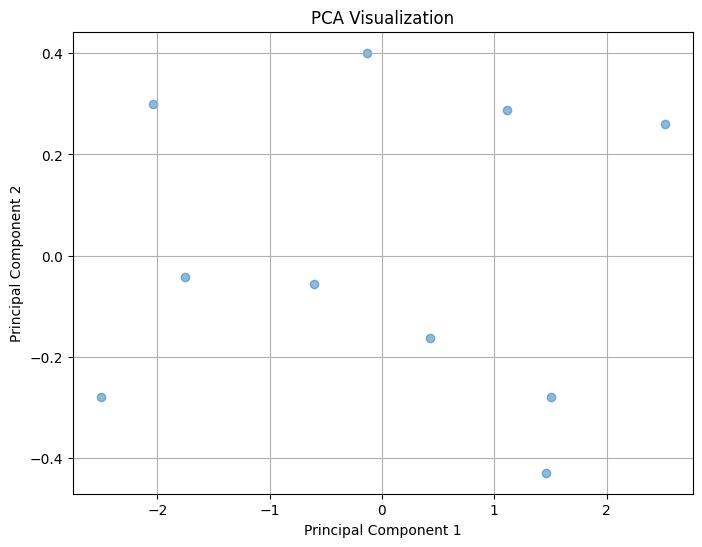

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Step1: Sample dataset (10 records, 3 features)

data = np.array([
    [2.5, 2.4, 1.2],
    [0.5, 0.7, 0.3],
    [2.2, 2.9, 1.4],
    [1.9, 2.2, 1.1],
    [3.1, 3.0, 1.7],
    [2.3, 2.7, 1.5],
    [2.0, 1.6, 0.9],
    [1.0, 1.1, 0.4],
    [1.5, 1.6, 0.8],
    [1.1, 0.9, 0.2]
])



df = pd.DataFrame(data, columns=["X", "Y", "Z"])
print(df)

#Step2: Stadardization using pandas (avoids Nan issues)

standardized_df = (df - df.mean()) / df.std()
print(standardized_df)

#Step3: Calculate covariance matrix

cov_matrix = standardized_df.cov()
print(cov_matrix)

#Step4: Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

#Step5: Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

#Step6: Select top 2 eigenvectors
eigenvectors_subset = eigenvectors[:, :2]

#Step7: Project data to new basis
reduced_data = standardized_df.to_numpy().dot(eigenvectors_subset)
reduced_df = pd.DataFrame(reduced_data, columns=["PC1", "PC2"])
print(reduced_df)

#Step8: Output the reduced data
print("\n Reduced Data (after PCA): \n", reduced_df)

#Step9: Visualize
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df["PC1"], reduced_df["PC2"], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")
plt.grid(True)
plt.show()